In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [7]:
file = open("Pride and Prejudice .txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'FROM http://www.gutenberg.org/ebooks/1342 Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters. "My dear Mr. Bennet," said his lady to him one day, "have you heard that'

In [8]:
len(data)

681052

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[39, 3952, 3953, 3954, 3955, 3956, 3957, 258, 3958, 12, 23, 7, 532, 2433, 693]

In [10]:
len(sequence_data)

122223

In [11]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

6447


In [12]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  122220


array([[  39, 3952, 3953, 3954],
       [3952, 3953, 3954, 3955],
       [3953, 3954, 3955, 3956],
       [3954, 3955, 3956, 3957],
       [3955, 3956, 3957,  258],
       [3956, 3957,  258, 3958],
       [3957,  258, 3958,   12],
       [ 258, 3958,   12,   23],
       [3958,   12,   23,    7],
       [  12,   23,    7,  532]])

In [13]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [14]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[  39 3952 3953]
 [3952 3953 3954]
 [3953 3954 3955]
 [3954 3955 3956]
 [3955 3956 3957]
 [3956 3957  258]
 [3957  258 3958]
 [ 258 3958   12]
 [3958   12   23]
 [  12   23    7]]
Response:  [3954 3955 3956 3957  258 3958   12   23    7  532]


In [15]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             64470     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 6447)              6453447   
                                                                 
Total params: 19,566,917
Trainable params: 19,566,917
Non-trainable params: 0
_________________________________________________________________


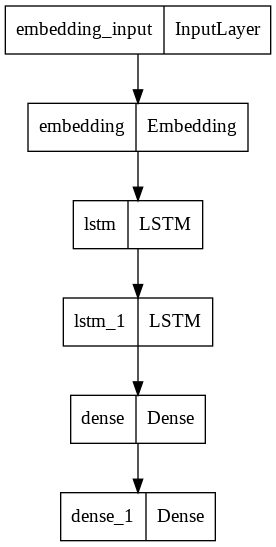

In [18]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
1907/1910 [============================>.] - ETA: 0s - loss: 6.1680
Epoch 1: loss improved from inf to 6.16720, saving model to next_words.h5
1910/1910 [==============================] - 36s 15ms/step - loss: 6.1672
Epoch 2/70
1909/1910 [============================>.] - ETA: 0s - loss: 5.5501
Epoch 2: loss improved from 6.16720 to 5.55005, saving model to next_words.h5
1910/1910 [==============================] - 28s 15ms/step - loss: 5.5500
Epoch 3/70
1907/1910 [============================>.] - ETA: 0s - loss: 5.2337
Epoch 3: loss improved from 5.55005 to 5.23371, saving model to next_words.h5
1910/1910 [==============================] - 28s 15ms/step - loss: 5.2337
Epoch 4/70
1910/1910 [==============================] - ETA: 0s - loss: 5.0130
Epoch 4: loss improved from 5.23371 to 5.01302, saving model to next_words.h5
1910/1910 [==============================] - 29s 15ms/step - loss: 5.0130
Epoch 5/70
1909/1910 [============================>.] - ETA: 0s - loss: 4.8189
E

In [20]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [21]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: that he never speaks much, unless among his intimate
['among', 'his', 'intimate']
1/1 [==============================] - 1s 1s/step
acquaintances
Enter your line: but to be so easily seen through I am afraid is
['am', 'afraid', 'is']
1/1 [==============================] - 0s 16ms/step
pitiful
Enter your line: had more to say than he could well manage before the carriage stopped at Longbourn 
['at', 'Longbourn', '']
1/1 [==============================] - 1s 650ms/step
there
Enter your line: After a week spent in professions of love and schemes of 
['schemes', 'of', '']
1/1 [==============================] - 0s 17ms/step
it
Enter your line: Bennet rejoiced to see Jane in undiminished
['Jane', 'in', 'undiminished']
1/1 [==============================] - 0s 16ms/step
beauty
Enter your line: 0
Execution completed.....
